Data source: https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction?sort=most-comments 

In [31]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# import data from excel file and review first few records
df = pd.read_excel('ECommerceDataset.xlsx', sheet_name = 'E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [33]:
# explore dataset statistics
df.describe()

,CustomerID,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,52815.500000,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,1625.385339,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,50001.000000,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,51408.250000,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,52815.500000,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,54222.750000,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,55630.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [36]:
# find features data types and non-null count (missing values)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [37]:
# make a copy of the original dataframe before making changes
dt = df.copy()

In [38]:
# remove columns that are irrelevant to analysis
df.drop('CustomerID', axis=1, inplace=True)

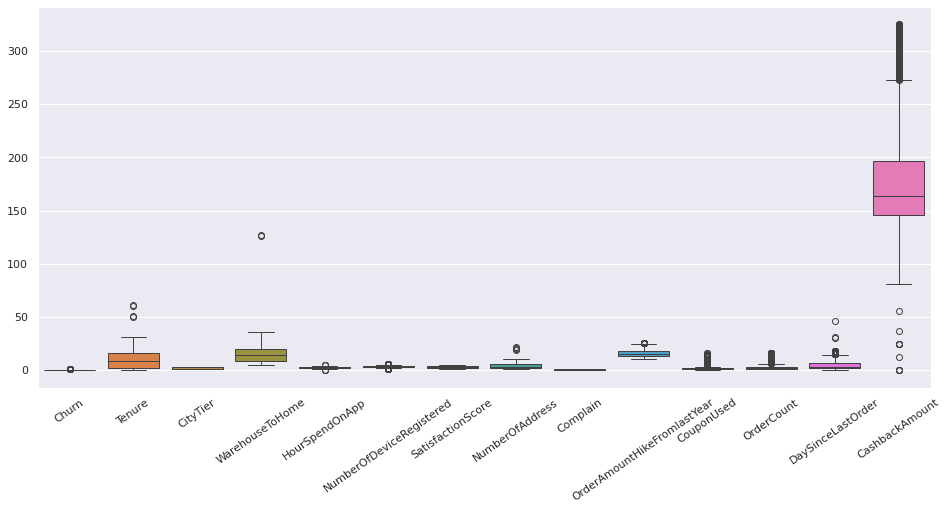

In [40]:
# make a plot to see outliers for ech feature (column)
sns.set(style="darkgrid", palette="bright")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=35)
plt.show()

Use quantile based flooring method to treat outliers.

In [7]:
cat = df.select_dtypes(include='object').columns # object (string) type columns

In [8]:
cat

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [9]:
cat_list = list(cat)

In [26]:
num = list(df.select_dtypes(exclude='object').columns) # numerical (int and float) type columns

In [27]:
cat_list

['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus']

In [28]:
# Churn is the output (label) column and we remove it in outlier treatment
num.remove('Churn')

In [29]:
num

['Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [41]:
# all outlier values will be replaced by Q1-(1.5 * IQR) and  Q3+(1.5 * IQR)
for cols in num:
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR=Q3-Q1
    lr= Q1-(1.5 * IQR)
    ur= Q3+(1.5 * IQR)
    df[cols] = df[cols].mask(df[cols]<lr, lr, )
    df[cols] = df[cols].mask(df[cols]>ur, ur, )

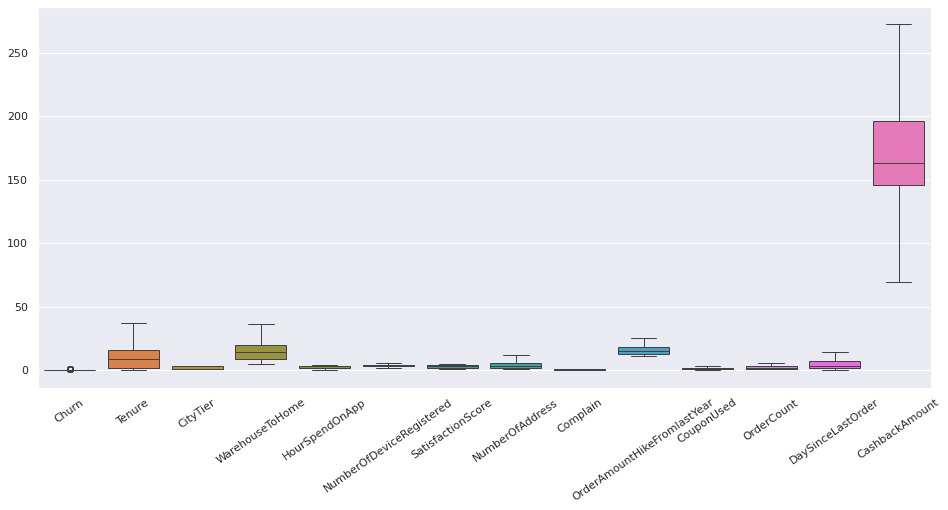

In [42]:
# plot again to see if we could treat the outliers
sns.set(style="darkgrid", palette="bright")
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(data=df)
plt.xticks(rotation=35)
plt.show()

In [43]:
# check number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   float64
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [44]:
# handle missing values in numerical features by replacing them with mean or median
df.fillna({'WarehouseToHome': df.WarehouseToHome.median()}, inplace=True)
df.fillna({'HourSpendOnApp': df.HourSpendOnApp.median()}, inplace=True)
df.fillna({'OrderAmountHikeFromlastYear': df.OrderAmountHikeFromlastYear.median()}, inplace=True)
df.fillna({'CouponUsed': df.CouponUsed.median()}, inplace=True)
df.fillna({'OrderCount': df.OrderCount.median()}, inplace=True)
df.fillna({'DaySinceLastOrder': df.DaySinceLastOrder.median()}, inplace=True)
df.fillna({'Tenure': df.Tenure.median()}, inplace=True)

In [45]:
cat

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [46]:
# we don't have missing values in categorical features 
df.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Univariate analysis to find patterns for each single categorical variable and its relation to the output

In [51]:
# a look at categorical features and the frequency of their values
cat

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [52]:
for col in cat:
    print(df[col].value_countscounts())

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
Gender
Male      3384
Female    2246
Name: count, dtype: int64
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: count, dtype: int64
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64


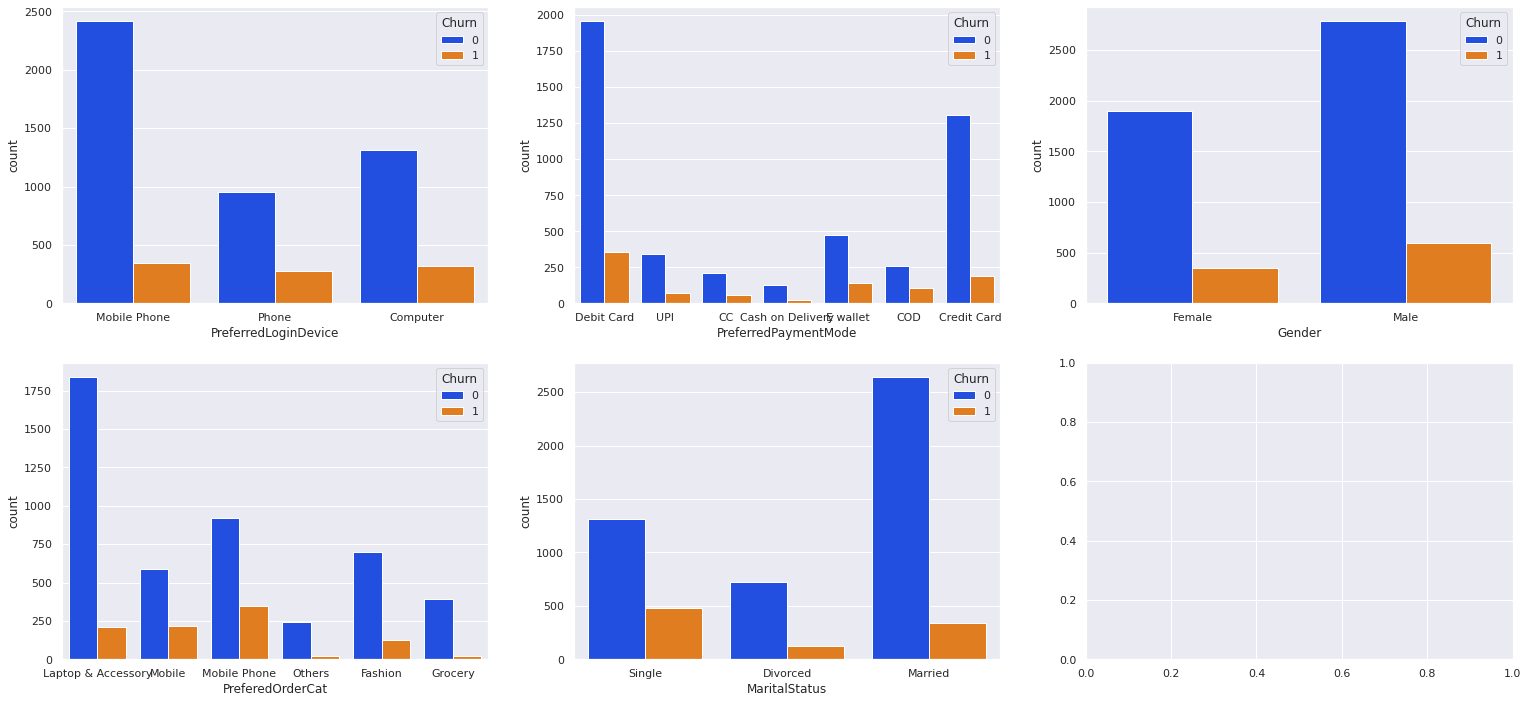

In [53]:
# create and determine number and size of the subplot windows
fix, ax = plt.subplots(nrows=2, ncols=3,figsize=(26,12))
# use the above 5 categories in x axis and churn as y axis
for col, subplot in zip(cat, ax.flatten()):
    sns.countplot(x= df[col], hue=df.Churn, ax=subplot)

Univariate analysis to find patterns for each single numerical variable and its relation to the output

In [23]:
num

['Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

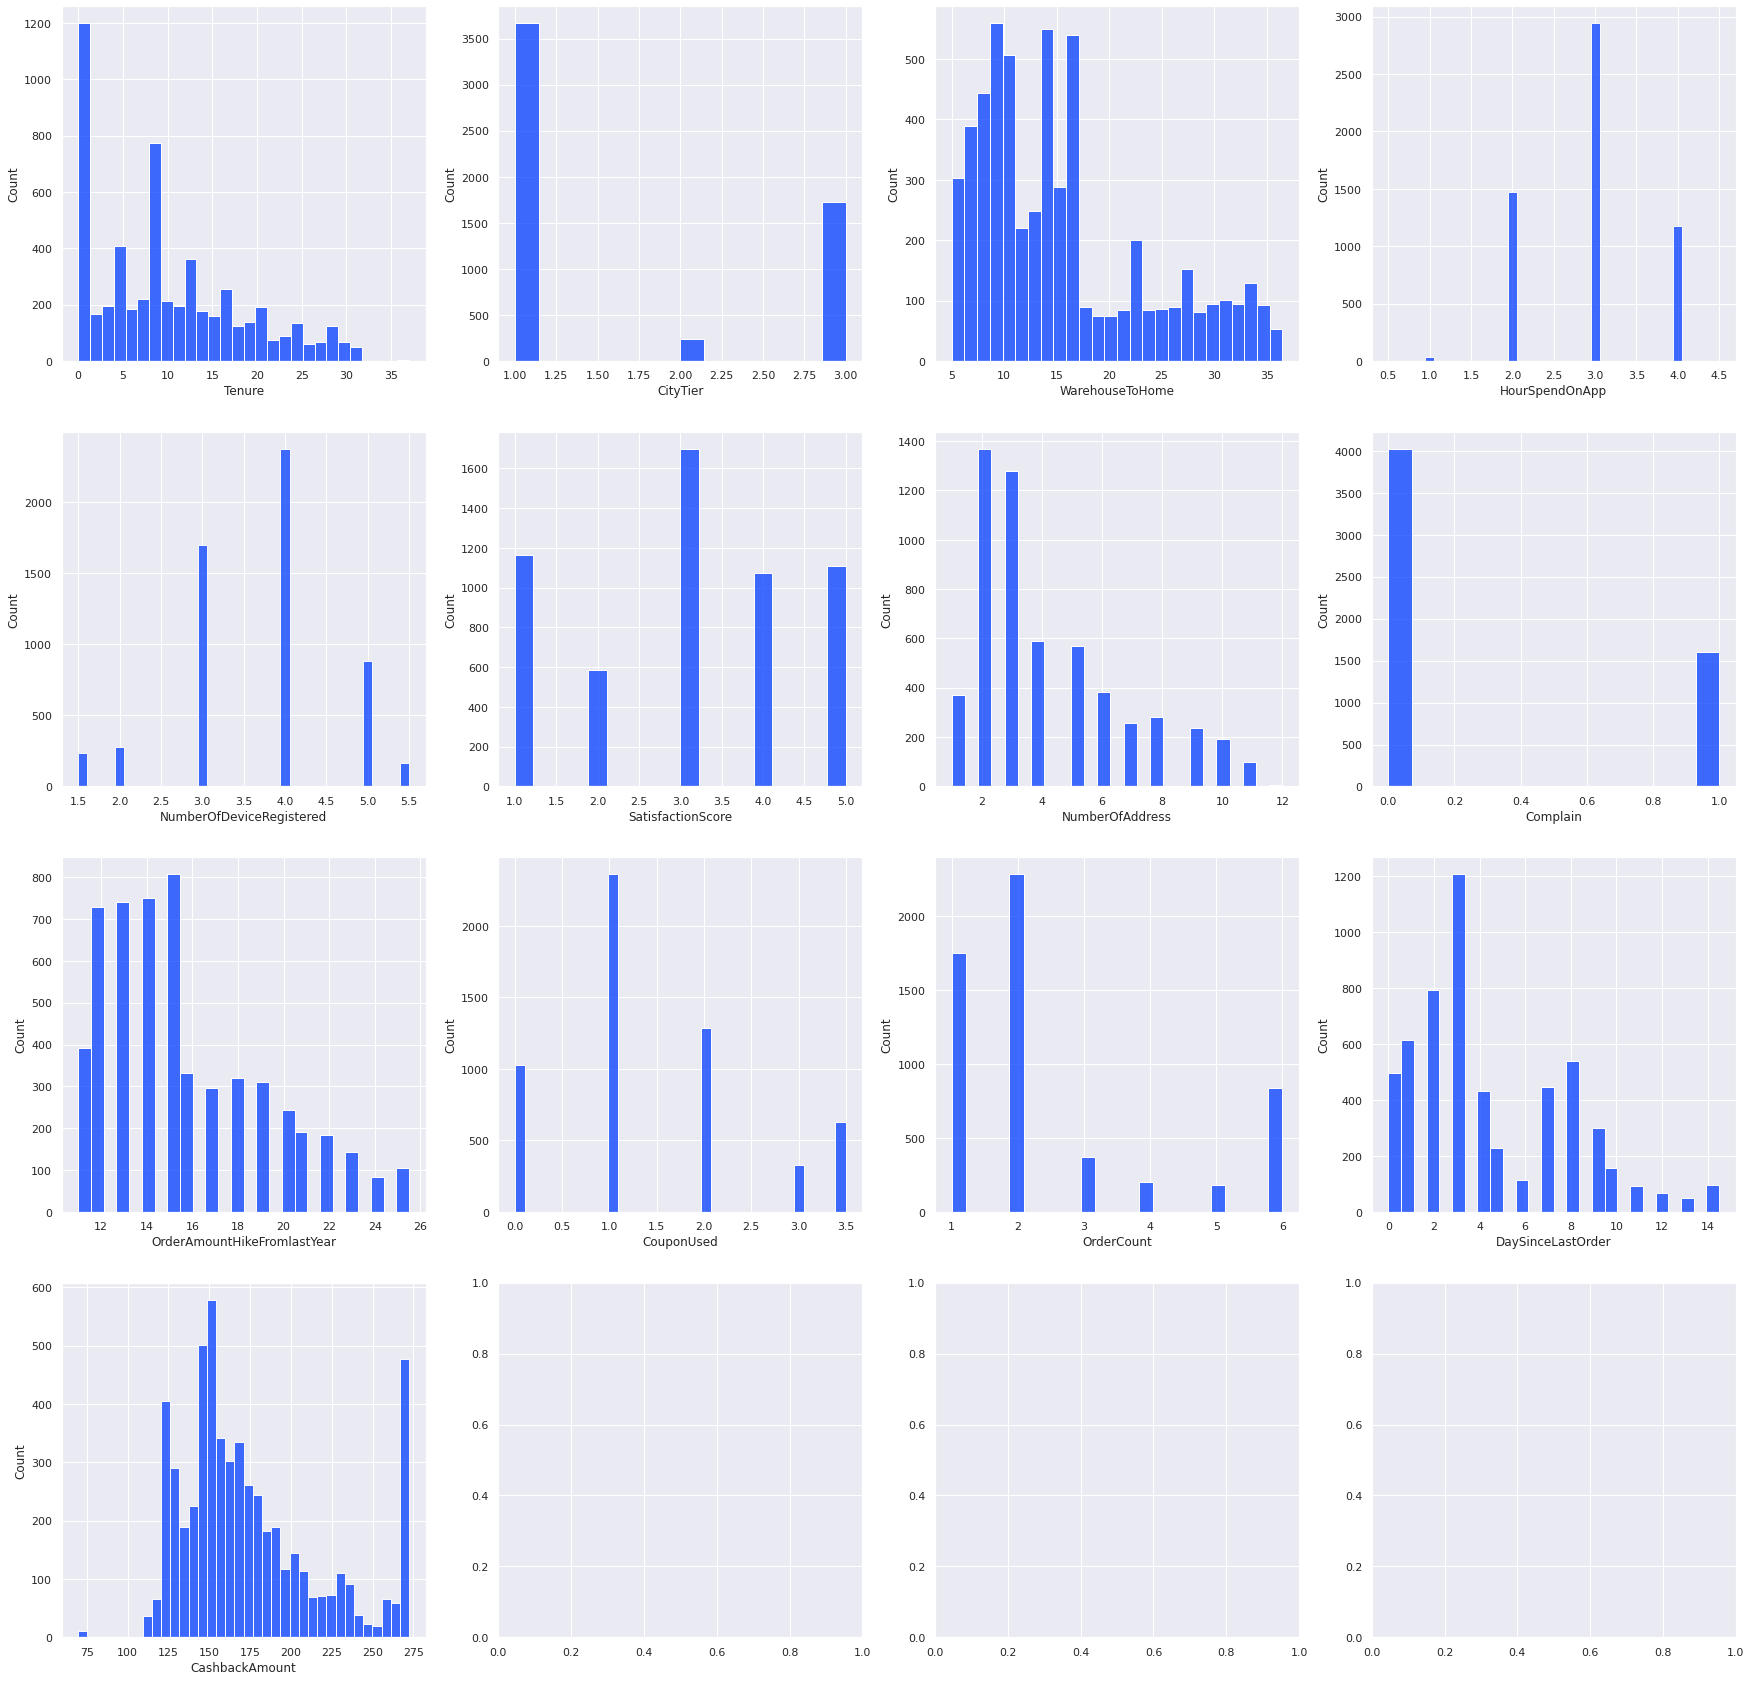

In [55]:
fig, ax = plt.subplots(4, 4, figsize=(30, 30))
for i, subplot in zip(num, ax.flatten()):
    sns.histplot(df[i], kde = False, ax=subplot)

Bivariate analysis to find correlations between each two variables

In [56]:
# return Churn feature back to the df
num = list(df.select_dtypes(exclude='object').columns)

<AxesSubplot:>

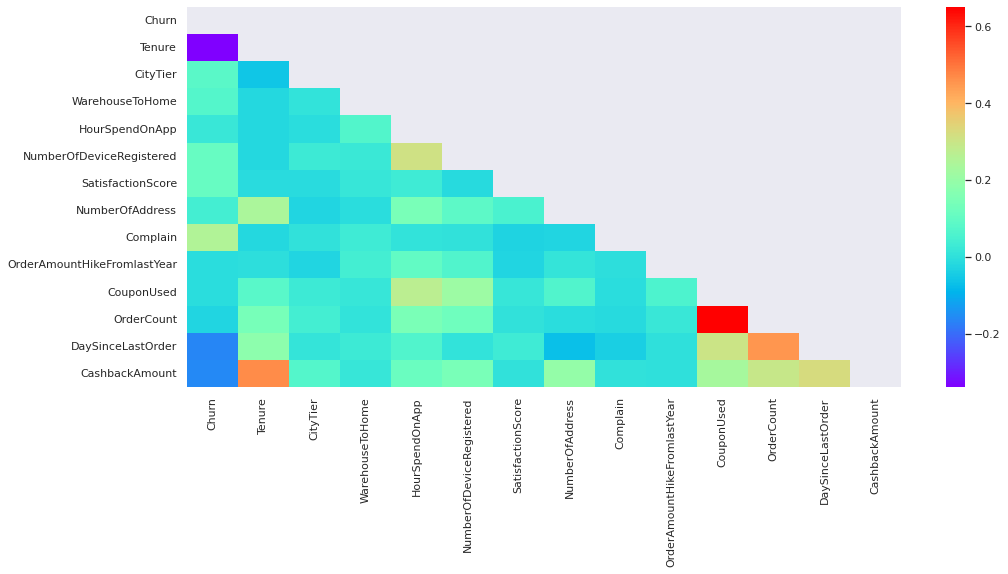

In [59]:
mask=np.zeros_like(df[num].corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots( figsize=(16, 7))
sns.heatmap(df[num].corr(method='pearson'), mask=mask, cmap='rainbow')

There is a positive correlation between CouponUsed and OrderCount, OrderCount and DaySinceLastOrder, Tenure and CashbackAmount, Complain and Churn. There is negative correlation between Tenure and Churn. 

After data cleaning and analysis, we move on to classification part. We will use multiple classification algorithms and find out the best fitting one by using scikit learns pipeline and GridsearchCV.

In [60]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

Encode categorical values before feeding them to the algorithms. 

In [61]:
# all features with string (object) data types are encoded
enc = LabelEncoder()
for col in df.select_dtypes(include='object'):
    df[col]=enc.fit_transform(df[col])

In [62]:
# split data into train and test sets
X_train, X_test,y_train, y_test = train_test_split(df.drop('Churn', axis=1), df.Churn)

In [63]:
# make a class to pass through multiple classifiers
class my_classifier(BaseEstimator,):
    def __init__(self, estimator=None):
        self.estimator = estimator
    def fit(self, X, y=None):
        self.estimator.fit(X,y)
        return self
    def predict(self, X, y=None):
        return self.estimator.predict(X,y)
    def predict_proba(self, X):
        return self.estimator.predict_proba(X)
    def score(self, X, y):
        return self.estimator.score(X, y)

In [64]:
# create the pipeline
pipe = Pipeline([('scaler', StandardScaler()), ('clf', my_classifier())])

In [65]:
# define parameters
parameters = [
              {'clf':[LogisticRegression(max_iter=1000)],
               'clf__C':[0.001,0.01,.1,1],
               'clf__solver':['lbfgs','liblinear']
               },
             {'clf':[RandomForestClassifier()],
             'clf__criterion':['gini','entropy'], 
             },
             {
               'clf':[DecisionTreeClassifier()],
             'clf__criterion':['gini','entropy'],
             },
             {
              'clf':[XGBClassifier()],
             'clf__learning_rate':[0.01,0.1,0.2,0.3],
             'clf__reg_lambda':[0.01,0.1,1],
             'clf__reg_alpha': [0.01,0.1,0,1],
             }]

In [66]:
# pass the parameters to GridsearchCV
grid = GridSearchCV(pipe, parameters, cv=5)
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf', my_classifier())]),
             param_grid=[{'clf': [LogisticRegression(max_iter=1000)],
                          'clf__C': [0.001, 0.01, 0.1, 1],
                          'clf__solver': ['lbfgs', 'liblinear']},
                         {'clf': [RandomForestClassifier()],
                          'clf__criterion': ['gini', 'entropy']},
                         {'clf': [DecisionTreeClassifier()],
                          'clf__criterion': ['gini', 'e...
                                                max_cat_threshold=None,
                                                max_cat_to_onehot=None,
                                                max_delta_step=None,
                                                max_depth=None, max_leaves=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                multi_strategy=None,
                                                n_estimators=None, n_jobs=None,
                                                num_parallel_tree=None,
                                                random_state=None, ...)],
                          'clf__learning_rate': [0.01, 0.1, 0.2, 0.3],
                          'clf__reg_alpha': [0.01, 0.1, 0, 1],
                          'clf__reg_lambda': [0.01, 0.1, 1]}])

In [67]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.3,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [68]:
grid.best_score_

0.9583115062116155

In [69]:
y_pred = grid.predict(X_test,)

In [71]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
y_test

4610    0
305     0
2016    0
5191    1
3867    0
       ..
2487    0
277     0
1177    0
5328    0
1988    0
Name: Churn, Length: 1408, dtype: int64

<AxesSubplot:>

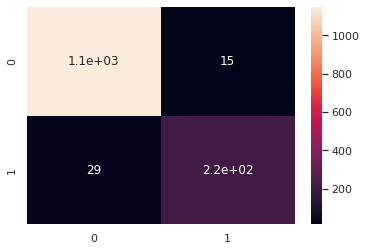

In [73]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

In [74]:
print(f1_score(y_test,y_pred))

0.9071729957805907


Feature importance: XGboost model automatically determines which features had more contribution to the overall prediction

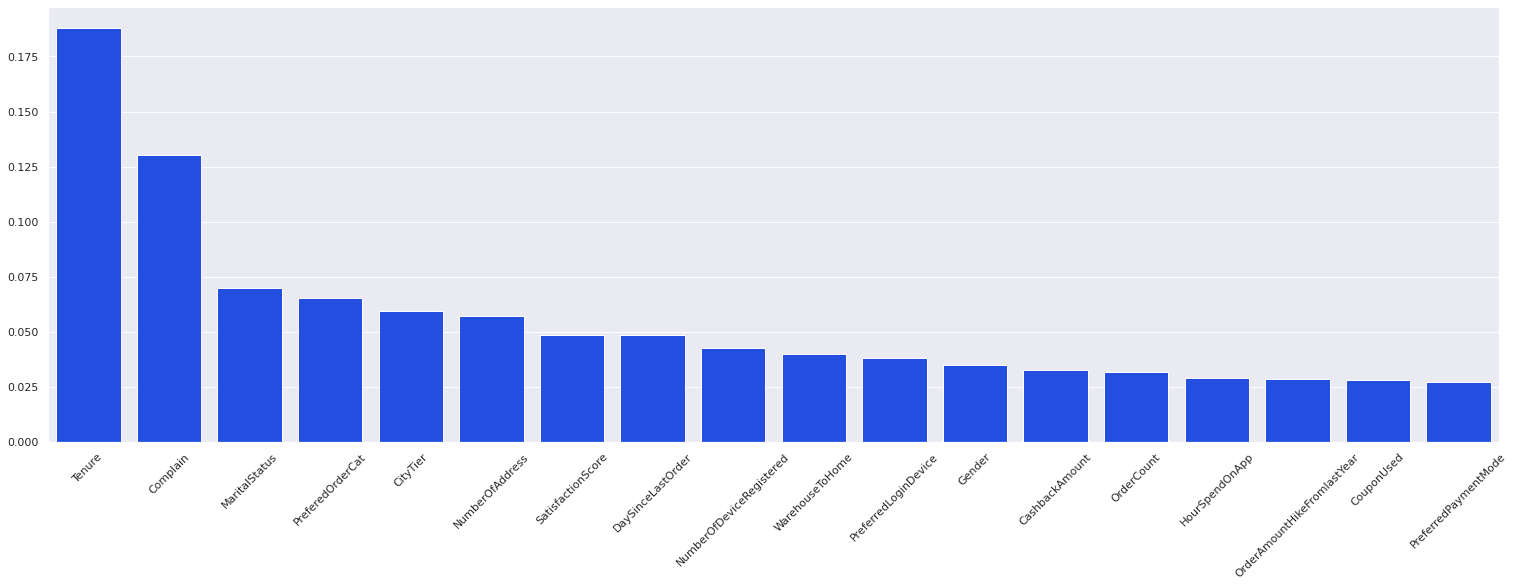

In [75]:
feature_array = grid.best_estimator_[-1].feature_importances_
importance = dict(zip(df.drop('Churn',axis=1).columns,feature_array))
importance = dict(sorted(importance.items(), key= lambda item:item[1],reverse = True) )
fig, ax = plt.subplots(figsize=(26,8))
sns.barplot(x=list(importance.keys()), y=list(importance.values()))
plt.tick_params(axis='x', labelrotation=45)
plt.show()